<a href="https://colab.research.google.com/github/imashoodnasir/Water-Quality-Prediction/blob/main/Water_Quality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**Safe and readily available water** is important for public health, whether it is used for drinking, domestic use, food production or recreational purposes. Improved water supply and sanitation, and better management of water resources, can boost countries’ economic growth and can contribute greatly to poverty reduction.
Contaminated water and poor sanitation are linked to transmission of diseases such as c**holera, diarrhoea, dysentery, hepatitis A, typhoid, and polio**. Absent, inadequate, or inappropriately managed water and sanitation services expose individuals to preventable health risks. This is particularly the case in health care facilities where both patients and staff are placed at additional risk of infection and disease when water, sanitation, and hygiene services are lacking. Globally, 15% of patients develop an infection during a hospital stay, with the proportion much greater in low-income countries.

So, I took some inspiration from this to use this **Water Quality** dataset to understand what consitutes to safe, Potable water and apply machine learning to it to distinguish between Potable and Non-Potable water.

# Feature Description


1.   **pH value:** PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
2.   **Hardness:** Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
3.   **Solids (Total dissolved solids - TDS):** Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
4.   **Chloramines:** Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
5.   **Sulfate:** Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
6.   **Conductivity:** Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
7.   **Organic_carbon:** Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
8.   **Trihalomethanes:** THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
9.   **Turbidity: **The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
10.   **Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from tqdm import tqdm_notebook
from scipy.stats import norm, boxcox
import os 

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configure kaggle
os.chdir('/root/')
!mkdir -p .kaggle
os.chdir('/root/.kaggle')
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Y-o0TVcjehM8SZB3Nt8U3xkyeQu-Nse-' -O kaggle.json > /dev/null 2>&1
!ls /root/.kaggle

# Set permissions 
!chmod 600 /root/.kaggle/kaggle.json

# Create data folder
os.chdir('/content/')

kaggle.json


# Importing Dataset

In [6]:
# Download data
!pip install -q kaggle
!kaggle datasets download -d adityakadiwal/water-potability

100% 251k/251k [00:00<00:00, 456kB/s]
100% 251k/251k [00:00<00:00, 455kB/s]


In [7]:
!unzip '/content/water-potability.zip' -d '/content/dataset/'

Archive:  /content/water-potability.zip
  inflating: /content/dataset/water_potability.csv  


In [8]:
df = pd.read_csv('/content/dataset/water_potability.csv')

# Exploratory Data Analysis

In [9]:
dataset = df.copy()
dataset.head(n = 10).style.background_gradient(cmap = "Purples_r")

In the code block above, we load the dataset. Then, just in case, we get a copy of the dataset. Because in some cases it may be necessary to use the original dataset.

In [10]:
dataset.shape

(3276, 10)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


All features except Potability are fractional. Except Target feature, other features are float and continueous value. we can convert the Portability into Categoring feature

In [12]:
dataset.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

Let's look at the statistics of the dataset

In [13]:
dataset['Potability']=dataset['Potability'].astype('category')

# Statistical Analysis

In [14]:
dataset.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='magma')

There are outliers in the data. We can delete no more than 1-2% of the data, i.e. 30-60 rows. From the above table, we can see that the count of each feature are not same. so there must me some null values. Feature Solids has the high mean and standard deviation comparted to other feature. so the distribution must be high. However, the above description is for overall population. lets try the same for 2 samples based on Portability feature

In [15]:
##Portability is 1 - means good for Human
dataset[dataset['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

In [16]:
# Portability is 0 - means not good for Human
dataset[dataset['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

Mean and std of almost all features are similar for both samples. there are few differnces in Solids feature. Further analysis using hypothetical testing could help us to identify the significance.

# Let's check our dataset for duplicates.

In [17]:
dataset.duplicated().sum()

0

It's ok.

# Preprocessing: Missing Value Problem

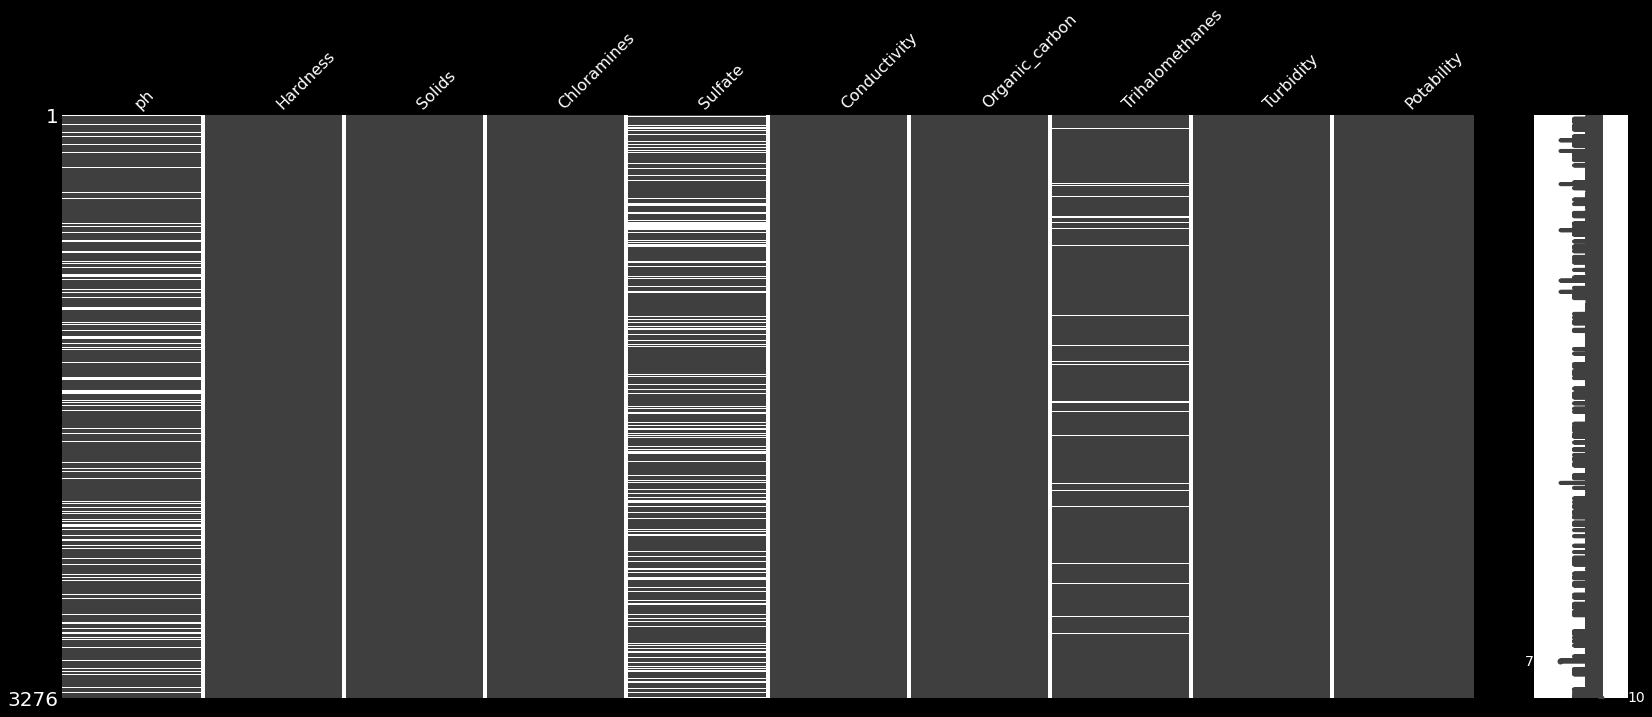

In [18]:
import missingno as msno
msno.matrix(dataset)
plt.show()

In [19]:
dataset.isnull().values.any()

True

In [20]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [21]:
dataset[dataset['Sulfate'].isnull()]

ph    Hardness        Solids  Chloramines  Sulfate  Conductivity  \
1     3.716080  129.422921  18630.057858     6.635246      NaN    592.885359   
2     8.099124  224.236259  19909.541732     9.275884      NaN    418.606213   
11    7.974522  218.693300  18767.656682     8.110385      NaN    364.098230   
14    7.496232  205.344982  28388.004887     5.072558      NaN    444.645352   
16    7.051786  211.049406  30980.600787    10.094796      NaN    315.141267   
...        ...         ...           ...          ...      ...           ...   
3266  8.372910  169.087052  14622.745494     7.547984      NaN    464.525552   
3272  7.808856  193.553212  17329.802160     8.061362      NaN    392.449580   
3273  9.419510  175.762646  33155.578218     7.350233      NaN    432.044783   
3274  5.126763  230.603758  11983.869376     6.303357      NaN    402.883113   
3275  7.874671  195.102299  17404.177061     7.509306      NaN    327.459760   

      Organic_carbon  Trihalomethanes  Turbidity Potability  
1          15.180013        56.329076   4.500656          0  
2          16.868637        66.420093   3.055934          0  
11         14.525746        76.485911   4.011718          0  
14         13.228311        70.300213   4.777382          0  
16         20.397022        56.651604   4.268429          0  
...              ...              ...        ...        ...  
3266       11.083027        38.435151   4.906358          1  
3272       19.903225              NaN   2.798243          1  
3273       11.039070        69.845400   3.298875          1  
3274       11.168946        77.488213   4.708658          1  
3275       16.140368        78.698446   2.309149          1  

[781 rows x 10 columns]

In [22]:
dataset[dataset['ph'].isnull()]

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0    NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
8    NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
13   NaN  150.174923  27331.361962     6.838223  299.415781    379.761835   
20   NaN  227.435048  22305.567414    10.333918         NaN    554.820086   
22   NaN  215.977859  17107.224226     5.607060  326.943978    436.256194   
...   ..         ...           ...          ...         ...           ...   
3224 NaN  198.218700  31081.735264     7.419106         NaN    517.925946   
3229 NaN  203.204659  10643.186771     6.828936         NaN    384.597711   
3231 NaN  225.754109  28194.452646     5.892830  366.201583    418.272901   
3245 NaN  188.536608  24711.414927     7.129520         NaN    555.548534   
3260 NaN  134.736856   9000.025591     9.026293         NaN    428.213987   

      Organic_carbon  Trihalomethanes  Turbidity Potability  
0          10.379783        86.990970   2.963135          0  
8          12.706049        53.928846   3.595017          0  
13         19.370807        76.509996   4.413974          0  
20         16.331693        45.382815   4.133423          0  
22         14.189062        59.855476   5.459251          0  
...              ...              ...        ...        ...  
3224       11.711419        85.428785   3.345543          1  
3229       16.011328        72.911573   3.065910          1  
3231       17.306832       103.912548   3.855895          1  
3245       16.959269        56.038702   4.331691          1  
3260        8.668672        74.773392   3.699558          1  

[491 rows x 10 columns]

In [23]:
dataset[dataset['Trihalomethanes'].isnull()]

ph    Hardness        Solids  Chloramines     Sulfate  \
62         NaN  229.485694  35729.692709     8.810843  384.943779   
81    5.519126  168.728583  12531.601921     7.730723         NaN   
110   9.286155  222.661551  12311.268366     7.289866  332.239359   
118   7.397413  122.541040   8855.114121     6.888689  241.607532   
119   7.812804  196.583886  42550.841816     7.334648         NaN   
...        ...         ...           ...          ...         ...   
3174  6.698154  198.286268  34675.862845     6.263602  360.232834   
3185  6.110022  234.800957  16663.539074     5.984536  348.055211   
3219  6.417716  209.702425  31974.481631     7.263425  321.382124   
3259  9.271355  181.259617  16540.979048     7.022499  309.238865   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity Potability  
62      296.397547       16.927092              NaN   3.855602          0  
81      443.570372       18.099078              NaN   3.758996          0  
110     353.740100       14.171763              NaN   5.239982          0  
118     489.851600       13.365906              NaN   3.149158          0  
119     442.545775       14.666917              NaN   6.204846          0  
...            ...             ...              ...        ...        ...  
3174    430.935009       12.176678              NaN   3.758180          1  
3185    437.892115       10.059523              NaN   2.817780          1  
3219    289.450118       11.369071              NaN   4.210327          1  
3259    487.692788       13.228441              NaN   4.333953          1  
3272    392.449580       19.903225              NaN   2.798243          1  

[162 rows x 10 columns]

Since the missing values are on both classess (Potability 1 & 0), we can replace it with population mean. so, we will replace the Nan values bases on sample mean from both classes.

# Imputing the missing values with the mean

In [24]:
#################################### Imputing 'ph' value #####################################

phMean_0 = dataset[dataset['Potability'] == 0]['ph'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 0) & (dataset['ph'].isna()), 'ph'] = phMean_0
phMean_1 = dataset[dataset['Potability'] == 1]['ph'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 1) & (dataset['ph'].isna()), 'ph'] = phMean_1

##################################### Imputing 'Sulfate' value #####################################

SulfateMean_0 = dataset[dataset['Potability'] == 0]['Sulfate'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 0) & (dataset['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = dataset[dataset['Potability'] == 1]['Sulfate'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 1) & (dataset['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

################################ Imputing 'Trihalomethanes' value #####################################

TrihalomethanesMean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 0) & (dataset['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = dataset[dataset['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
dataset.loc[(dataset['Potability'] == 1) & (dataset['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [25]:
print('Checking to see any more missing data \n')
dataset.isna().sum()

Checking to see any more missing data 



ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Countplot for Potability

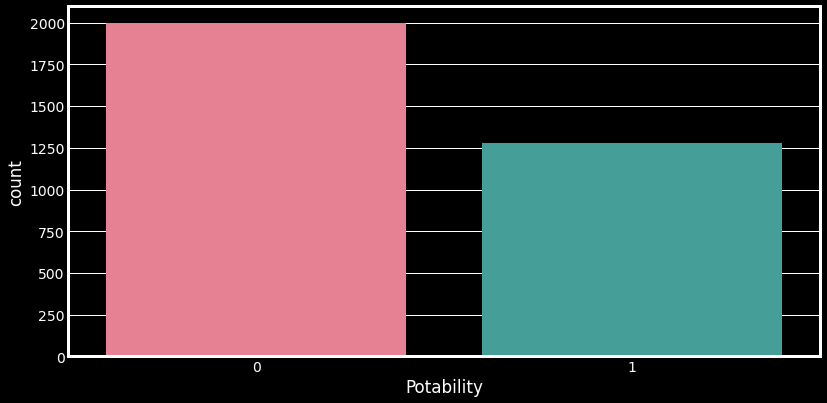

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=dataset, palette='husl');

There is a clear class imbalance.

# Some Box Plots

In [27]:
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

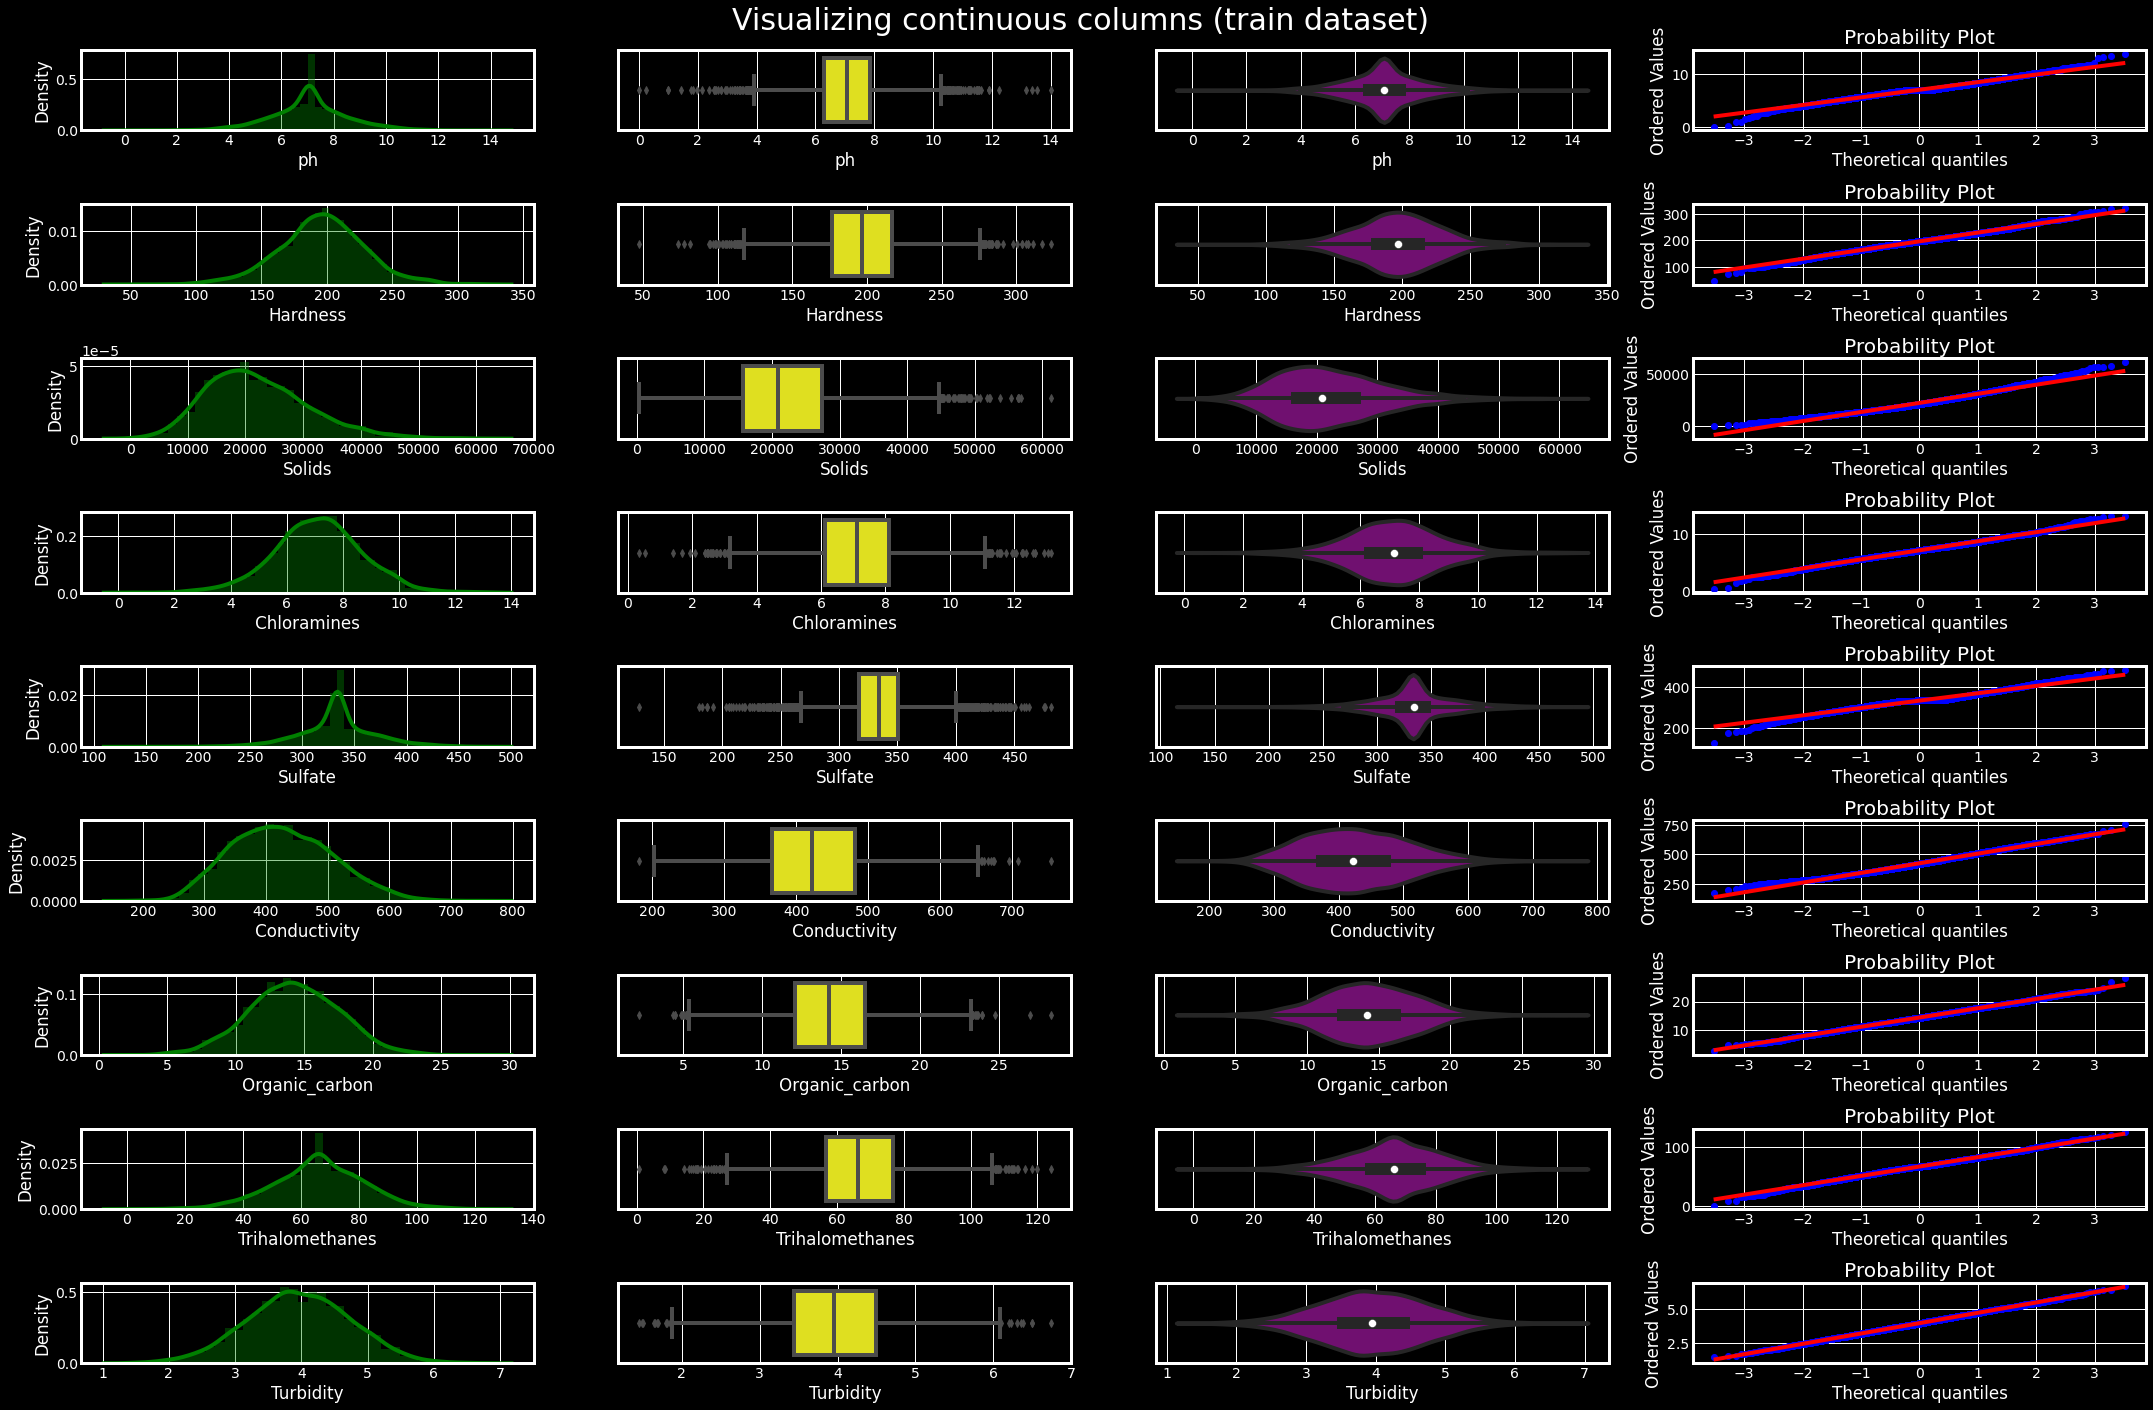

In [28]:
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(cols),4,figsize=(30,20))
for index,i in enumerate(cols):
    sns.distplot(dataset[i],ax=ax[index,0],color='green')
    sns.boxplot(dataset[i],ax=ax[index,1],color='yellow')
    sns.violinplot(dataset[i],ax=ax[index,2],color='purple')
    stats.probplot(dataset[i],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

After analyzing these graphs, the following hypotheses can be made:
*   Most features are distributed according to the normal distribution law.
*   There are minor outliers for some features.



Your Charts are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

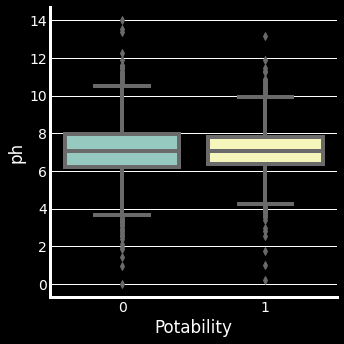

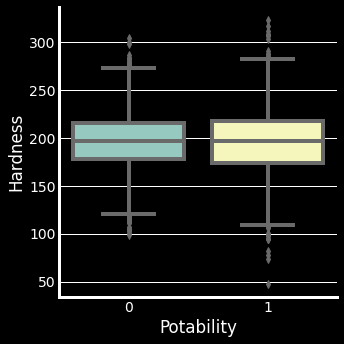

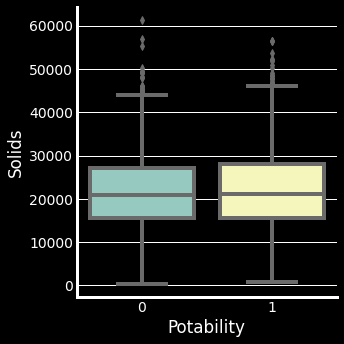

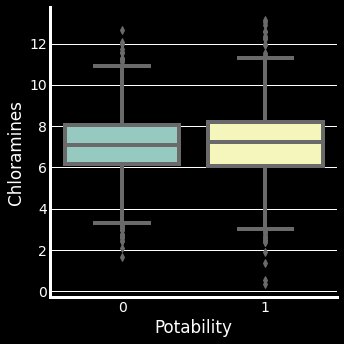

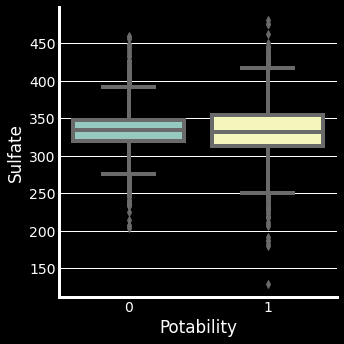

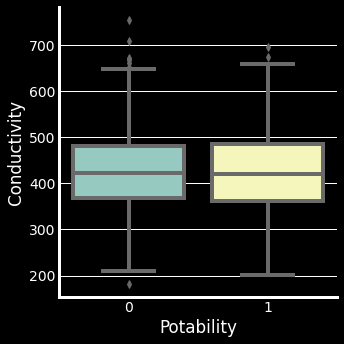

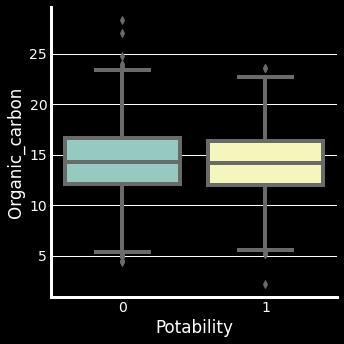

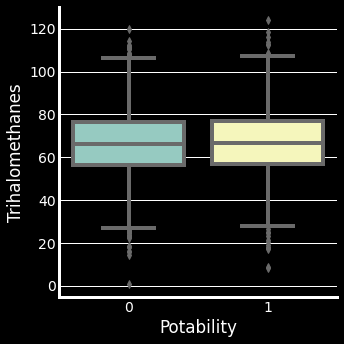

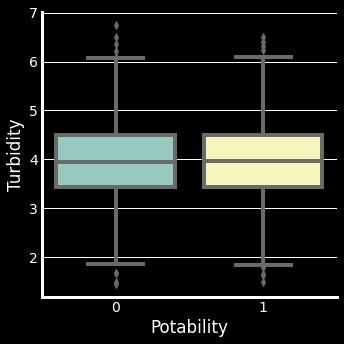

In [29]:
def boxPlotter(dataset, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    sns.catplot(x="Potability", y=columnName, data=dataset, kind="box");
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
    boxPlotter(dataset, column)

# Pie Chart

In [30]:
fig =  px.pie (dataset, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()


# Check for Correlation

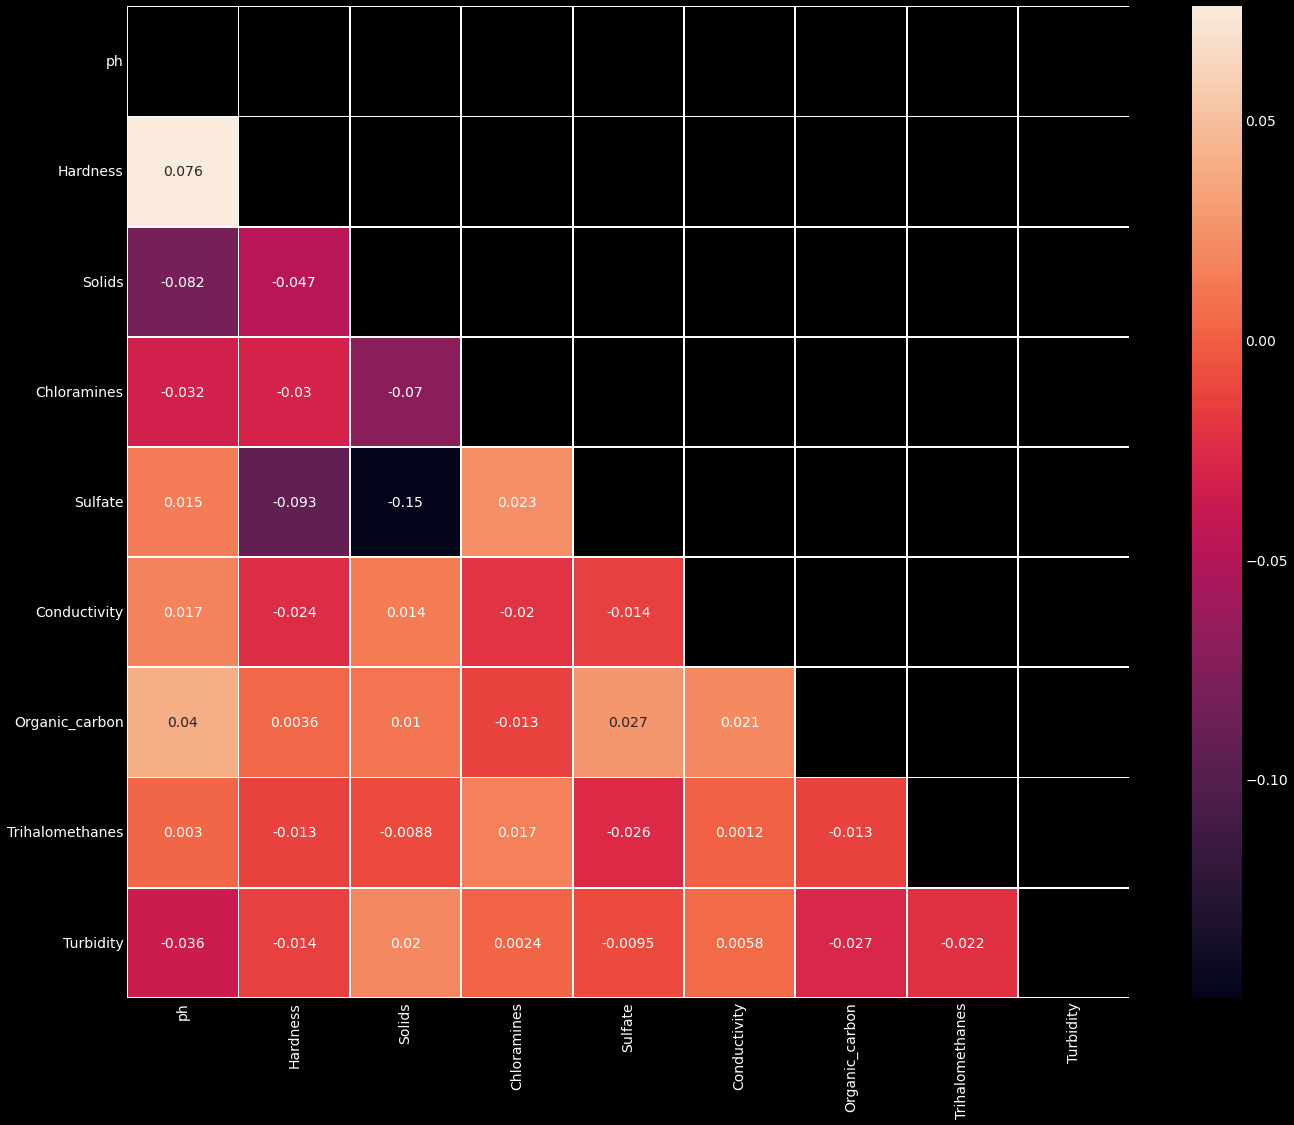

In [31]:
plt.figure(figsize=(20, 17))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

1.   The data shows very less correlation between all the features.
2.   Certain column seems to be skewed, let's correct the skewed columns.

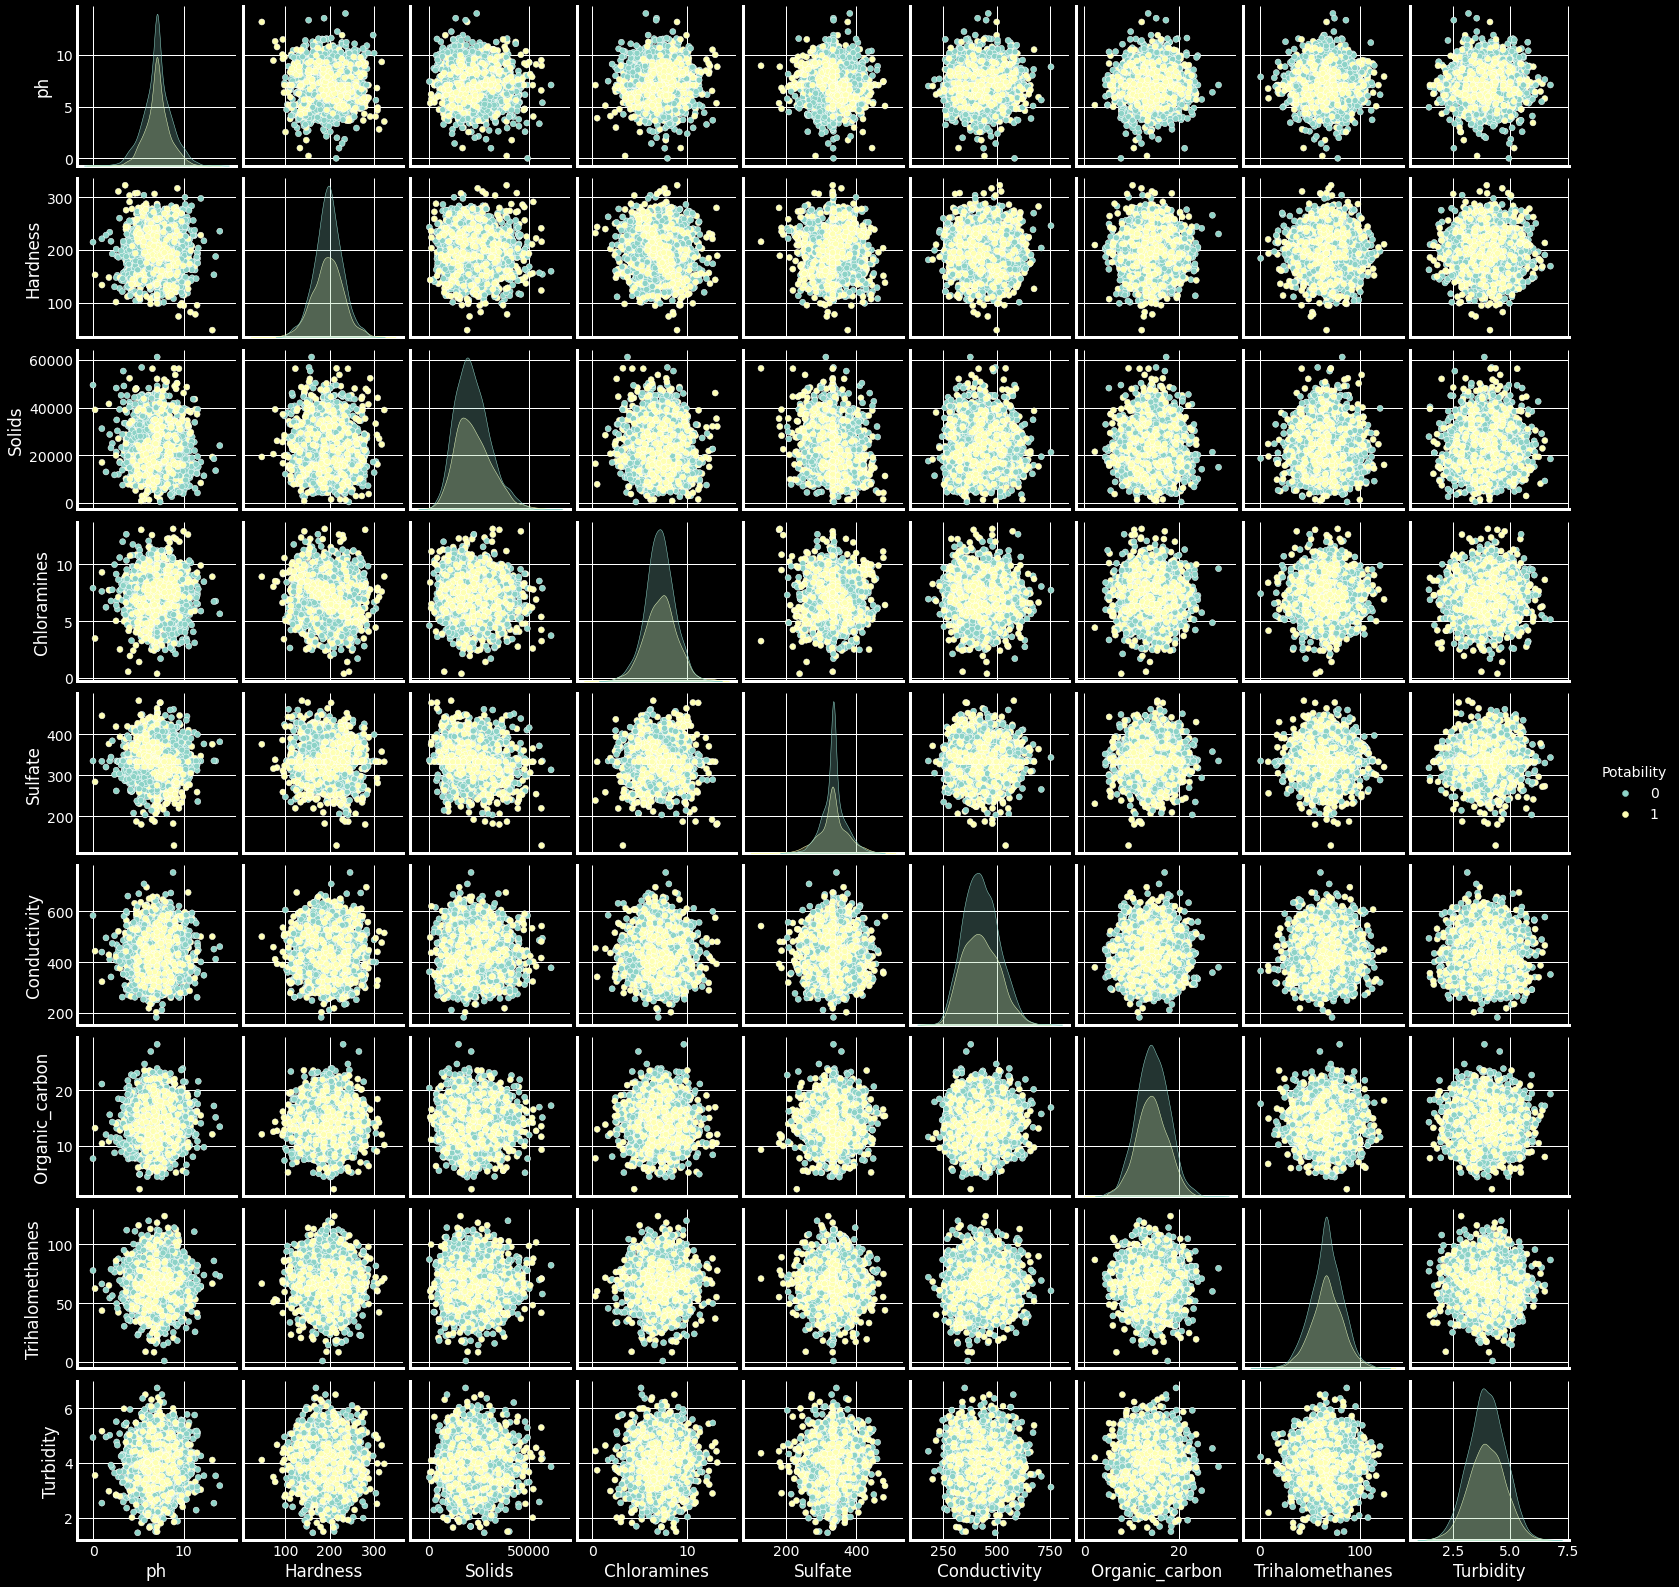

In [33]:
#plot pairplot of the dataset
#sns.pairplot(dataset, hue="Potability", palette="husl");
sns.pairplot(dataset, hue="Potability")

# **Pairplots**
From above charts we can confirm
1.   There seems to be very less correlation between all the features.
2.   'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity' columns are skewed. So, lets correct it


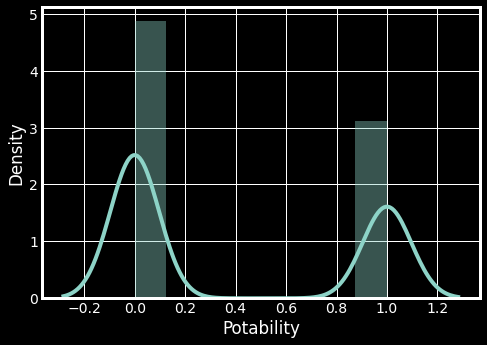

In [34]:
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(dataset['Potability'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f770c34bc10>,
      dtype=object)

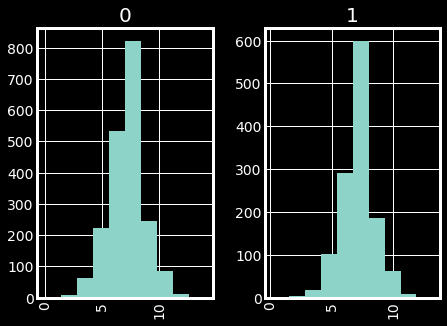

In [35]:
dataset.hist(column='ph', by='Potability')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f770c2b1730>,
      dtype=object)

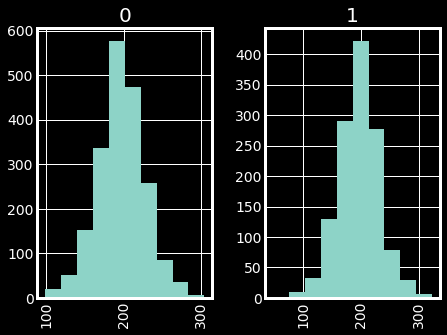

In [36]:
dataset.hist(column='Hardness', by='Potability')

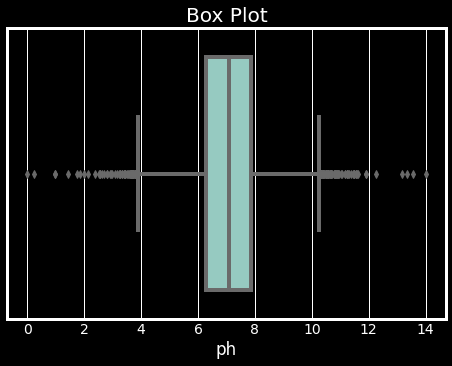

In [37]:
# Individual box plot for each feature
def Box(dataset):
    plt.title("Box Plot")
    sns.boxplot(dataset)
    plt.show()
Box(dataset['ph'])

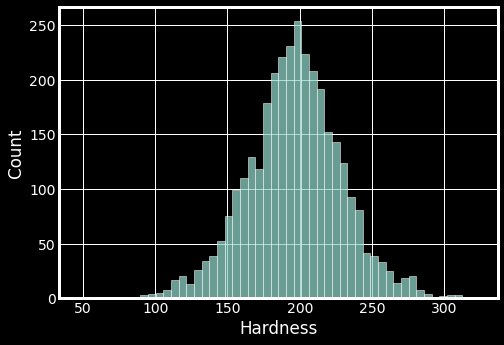

In [38]:
sns.histplot(x = "Hardness", data=dataset)

In [39]:
skew_val = dataset.skew().sort_values(ascending=False)
skew_val

Solids             0.621634
Conductivity       0.264490
ph                 0.027672
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Hardness          -0.039342
Sulfate           -0.041952
Trihalomethanes   -0.085042
dtype: float64

*   Using pandas skew function to check the correlation between the values.
*   Values between 0.5 to -0.5 will be considered as the normal distribution else will be skewed depending upon the skewness value.

In [40]:
fig = px.box(dataset, x="Potability", y="ph", color="Potability", width=800, height=400)
fig.show()

In [41]:
fig = px.histogram (dataset, x = "Sulfate",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

In [42]:
fig = px.box(dataset, x="Potability", y="Hardness", color="Potability", width=800, height=400)
fig.show()

In [43]:
fig = px.histogram (dataset, x = "Trihalomethanes",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

In [44]:
fig = px.scatter (dataset, x = "ph", y = "Sulfate", color = "Potability", template = "plotly_dark",  trendline="ols")
fig.show ()

In [45]:
fig = px.scatter (dataset, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly_dark",  trendline="lowess")
fig.show ()

# Data Preprocessing

In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter
##################### Preparing the Data for Modelling ######################

X = dataset.drop('Potability', axis = 1).copy()
y = dataset['Potability'].copy()

############################# Train-Test split ############################
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

########################## Synthetic OverSampling ###########################
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y_train)
print('Before SMOTE', counter)
X_train, y_train = smt.fit_resample(X_train, y_train)
counter = Counter(y_train)
print('\nAfter SMOTE', counter)

################################# Scaling #################################
ssc = StandardScaler()

X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

modelAccuracy = list()

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({0: 1505, 1: 952})

After SMOTE Counter({1: 1505, 0: 1505})


In [47]:
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
model = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(),
        svm.LinearSVC(), XGBClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier()]
trainAccuracy = list()
testAccuracy = list()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult = cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=kfold)
    trainAccuracy.append(trainResult.mean())
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)

In [48]:
print('The comparision\n')
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy' : trainAccuracy, 'Test_Accuracy' : testAccuracy})
modelScore

The comparision



Model  Train_Accuracy  \
0                               LogisticRegression()        0.493688   
1                           DecisionTreeClassifier()        0.703322   
2                                       GaussianNB()        0.549834   
3  (DecisionTreeClassifier(max_features='auto', r...        0.790698   
4                                        LinearSVC()        0.494684   
5                                    XGBClassifier()        0.753488   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.689037   
7  ([DecisionTreeRegressor(criterion='friedman_ms...        0.745515   
8                             KNeighborsClassifier()        0.645183   

   Test_Accuracy  
0       0.474969  
1       0.708181  
2       0.564103  
3       0.787546  
4       0.474969  
5       0.772894  
6       0.688645  
7       0.765568  
8       0.577534

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       493
           1       0.69      0.77      0.73       326

    accuracy                           0.77       819
   macro avg       0.76      0.77      0.77       819
weighted avg       0.78      0.77      0.77       819

None


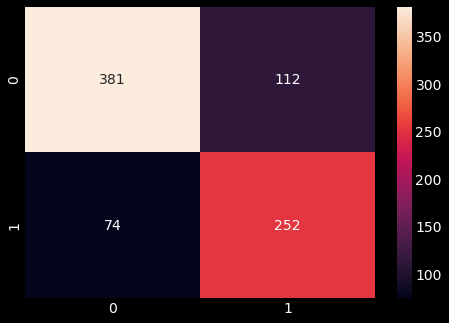

In [49]:
print('Random Forest Classifier\n')
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

y_Rfc = Rfc.predict(X_test)
print(metrics.classification_report(y_test, y_Rfc))
print(modelAccuracy.append(metrics.accuracy_score(y_test, y_Rfc)))

sns.heatmap(confusion_matrix(y_test, y_Rfc), annot=True, fmt='d')
plt.show()

XGB Classifier

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       493
           1       0.68      0.83      0.74       326

    accuracy                           0.77       819
   macro avg       0.77      0.78      0.77       819
weighted avg       0.79      0.77      0.78       819

None


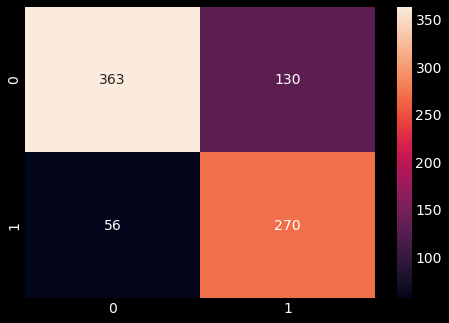

In [50]:
#################################### XGB Classifier() #######################
print('XGB Classifier\n')
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_xgb = xgb.predict(X_test)
print(metrics.classification_report(y_test, y_xgb))
print(modelAccuracy.append(metrics.accuracy_score(y_test, y_xgb)))

sns.heatmap(confusion_matrix(y_test, y_xgb), annot=True, fmt='d')
plt.show()

# Conclusion
*   The Solid levels seem to contain some descripency since its values are on an average 40 folds more than the upper limit for safe drinking water.(Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.)
*   The data contains almost equal number of acidic and basic pH level water samples.
*   The correlation coefficients between the features were very low.
*   Random Forest and XGBoost worked the best to train the model, both gives us f1 score (Balanced with precision & recall) as around 76%.